<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/NLP-Projects/blob/main/Language%20Detection/Language_Detection_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Enviorment

In [6]:
# Download Data
!kaggle datasets download basilb2s/language-detection
!unzip /content/language-detection.zip

Dataset URL: https://www.kaggle.com/datasets/basilb2s/language-detection
License(s): CC0-1.0
language-detection.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/language-detection.zip
  inflating: Language Detection.csv  


In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Import dataset
df = pd.read_csv("/content/Language Detection.csv")
df.head(5)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [11]:
# Check value counts
df['Language'].value_counts()

(Language
 English       1385
 French        1014
 Spanish        819
 Portugeese     739
 Italian        698
 Russian        692
 Sweedish       676
 Malayalam      594
 Dutch          546
 Arabic         536
 Turkish        474
 German         470
 Tamil          469
 Danish         428
 Kannada        369
 Greek          365
 Hindi           63
 Name: count, dtype: int64,)

In [46]:
labels = df['Language'].unique()
labels

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

# Preprocessing

In [32]:
def text_preprocessing(text):
#   text = text.lower()
#   text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    return text

In [33]:
df['Text_Preprocessed'] = df['Text'].apply(text_preprocessing)
df.head(5)

,Text,Language,Text_Preprocessed
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phy...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the onl...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human acti...
4,[1] The word nature is borrowed from the Old F...,English,[ ] the word nature is borrowed from the old f...


In [34]:
# Split X/y
X = df['Text_Preprocessed']
y = df['Language']

In [35]:
# Lable Encoder for Language
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
# Creating BoW
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(X).toarray()

In [37]:
X.shape

(10337, 39404)

## Train/Test Split

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Modelling

In [39]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [40]:
# Prediction on X_test
y_pred = model.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))

0.9850096711798839


In [42]:
print(confusion_matrix(y_test, y_pred))

[[108   0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  72   0   1   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0 117   2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 279   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 197   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0  92   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  82   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0 128   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0  75   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 123   0   0   0   0   0   0]
 [  0   0   0   2   1   0   0   0   0   0   0 141   0   0   0   0   0]
 [  0   0   0   5   0   0   0   0   0   0   0   0 130   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0   0   1   0 167   0   0   0]
 [  0 

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       112
           1       1.00      0.97      0.99        74
           2       1.00      0.98      0.99       119
           3       0.91      1.00      0.96       279
           4       0.99      0.99      0.99       198
           5       1.00      0.99      0.99        93
           6       1.00      1.00      1.00        82
           7       1.00      1.00      1.00        12
           8       0.99      0.99      0.99       129
           9       1.00      0.99      0.99        76
          10       0.99      1.00      1.00       123
          11       0.99      0.98      0.99       144
          12       1.00      0.96      0.98       135
          13       1.00      0.98      0.99       170
          14       0.99      0.99      0.99       130
          15       1.00      0.96      0.98       108
          16       1.00      0.96      0.98        84

    accuracy              

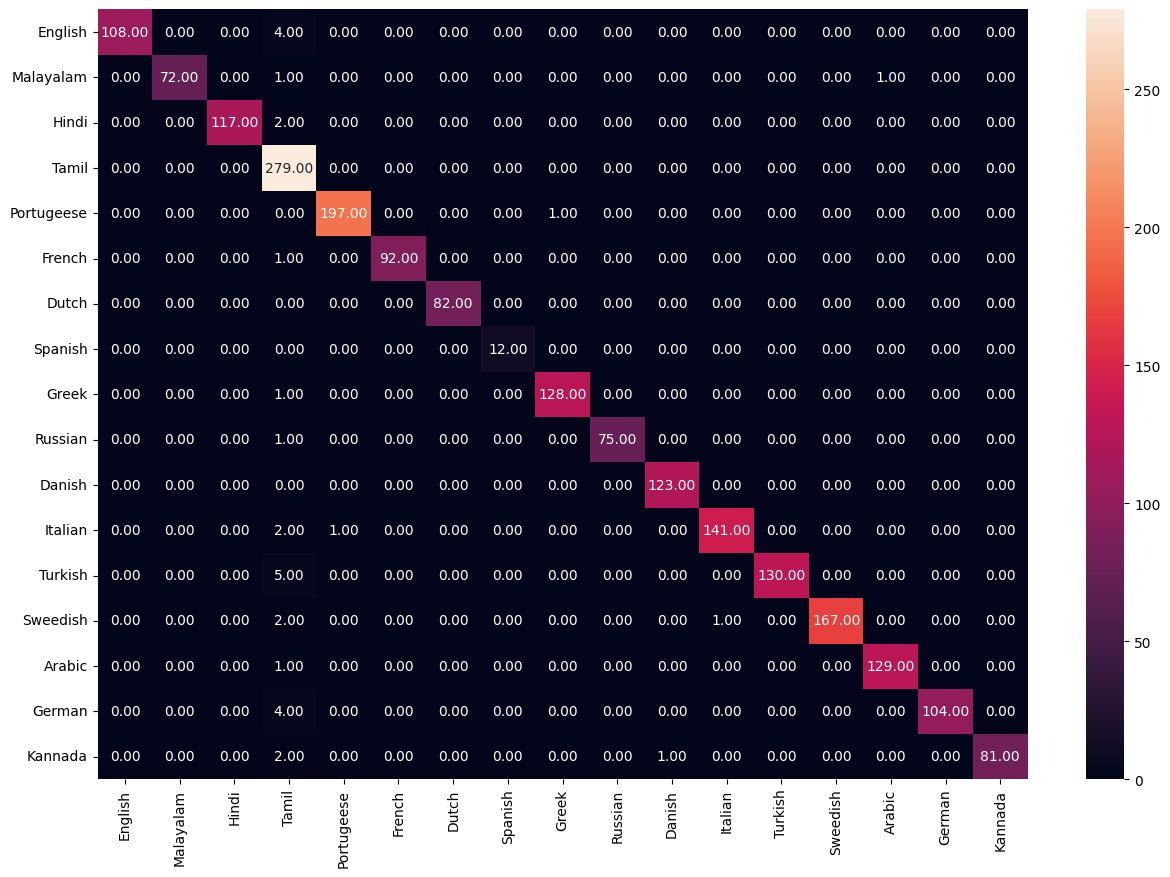

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot = True,
            fmt="3.2f",
            xticklabels=labels,
            yticklabels=labels)
plt.show()